# ! Do not make any further modifications!

**Quantum Illumination with Non-Gaussian States**

- Author: Longfei Fan
- Created Date: 07/01/2016
- Last Modified: 11/10/2016
- Latest: 11/22/2016

This file contains the preliminary code and results for quantum illumnination with non-Gaussian states. Code has been summarized in `QI.py`

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
# from scipy.special import comb, factorial

from QI import *

In [2]:
%matplotlib inline
from matplotlib import rc
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
np.set_printoptions(threshold='nan', precision=6, suppress=True)

# I. Quantum Illumination with Non-Gaussian States

## Evaluating

In [3]:
# Evaluating states
def P_ERR_vs_M_Data(Nth, N, eta, s, states):
    """ Nth: average photon number of thermal noise
        N: truncated photon number when doing numerical calculations
        eta: reflection rate or transimittancetran
        s: squeezing parameter
        states: states need to be evaluated
    """
    # points need to be calculated
    Ms = np.logspace(2, 6, num=50)
    Ms = np.array([np.int(i) for i in Ms])
    
    # IMPORTANT PARAMETERS, ra, tb !!!
    ra, tb = 0.1, 0.25
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    
    # calculation
    data_tr, data_bound = {}, {}
    for state_name, state_func in states.iteritems():
        if state_name == 'PCS':
            rho_0 = RHO_0(state_func, N, s, Nth, rt_list)
            rho_1 = RHO_1(state_func, N, s, Nth, eta, rt_list)            
        else:
            rho_0 = RHO_0(state_func, N, s, Nth)
            rho_1 = RHO_1(state_func, N, s, Nth, eta)
        
        tr_sqrt = QCB(rho_0, rho_1, approx=True)
        data_tr[state_name] = tr_sqrt
        
        lower = np.array([lower_bound(tr_sqrt, M) for M in Ms])
        upper = np.array([upper_bound(tr_sqrt, M) for M in Ms])
        data_bound[state_name] = (lower, upper)
        
    return Ms, data_tr, data_bound

## Ploting

In [4]:
def P_ERR_vs_M_Plot(title, data, states):
    x, data_tr, data_bound = data
    for state in states:
        print state + ':\t' + str(data_tr[state])
    
    lsty = {'TMSS': '-', 'PS': '--', 'PA': ':', 'PSA': '-.', 'PAS': '--', 'PCS': ':'}
    fig, ax = plt.subplots()
    for state in states:
        ax.plot(x, data_bound[state][1], color='b', linestyle=lsty[state], label=state)
        ax.plot(x, data_bound[state][0], color='r', linestyle=lsty[state], label=state)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([1e-6, 1])
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('$M$', fontsize=14)
    ax.set_ylabel('$P_{err}$', fontsize=14)

    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=None)
    
    return fig, lgd

### 1. $N_s = 0.01, N_{th} = 0.1, \eta = 0.01$.

In [5]:
fig_title = '$N_{th} = 0.1$, $N_s = 0.01$, $R = 0.01$'
states = {'TMSS': TMSS, 'PS': p_sub, 'PA': p_add, 
          'PAS': p_add_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}
# states = {'TMSS': TMSS, 'PS': p_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}

Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s, states)
# fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
# fig.savefig("N_1e-1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

PS:	0.999677113295
PA:	0.999263243257
TMSS:	0.999914200052


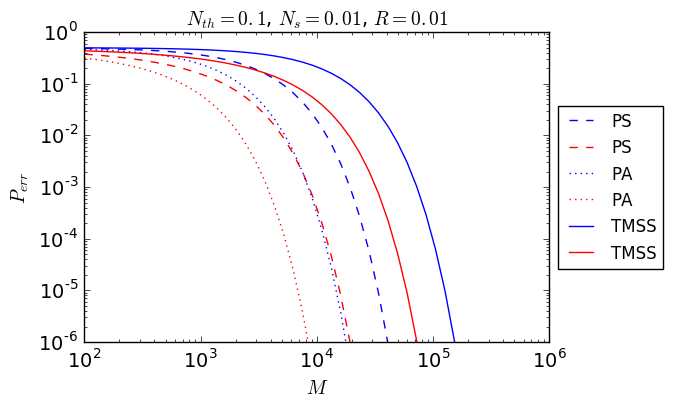

In [15]:
fig_title = '$N_{th} = 0.1$, $N_s = 0.01$, $R = 0.01$'

states = {'TMSS': TMSS, 'PS': p_sub, 'PA': p_add}

fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
fig.savefig("N_1e-1_S_A.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

PS:	0.999677113284
PA:	0.999263243138
TMSS:	0.999914200049


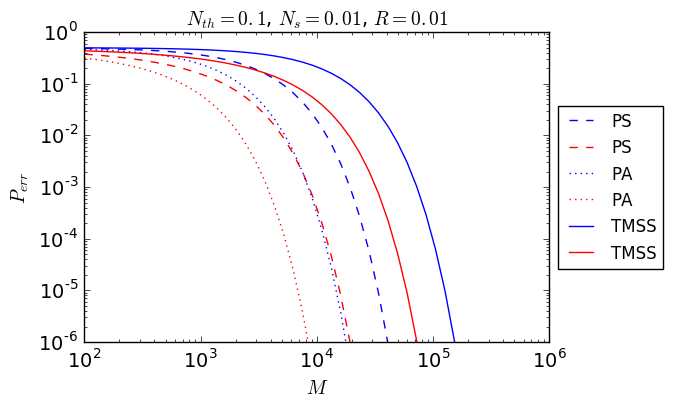

In [6]:
fig_title = '$N_{th} = 0.1$, $N_s = 0.01$, $R = 0.01$'

states = {'TMSS': TMSS, 'PS': p_sub, 'PA': p_add}

fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
fig.savefig("N_1e-1_S_A.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

PAS:	0.997783229367
PSA:	0.998900522122
TMSS:	0.999914200049


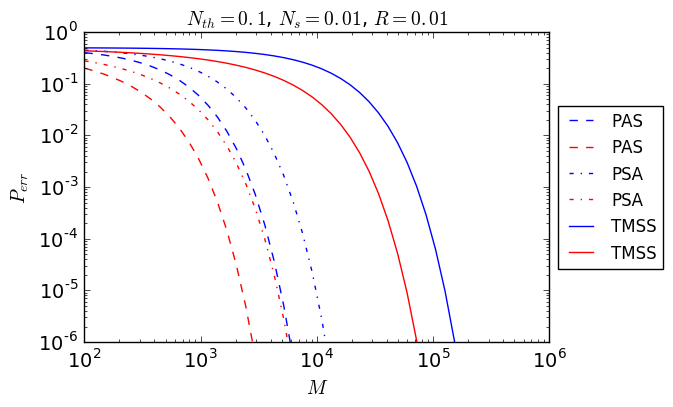

In [7]:
fig_title = '$N_{th} = 0.1$, $N_s = 0.01$, $R = 0.01$'

states = {'TMSS': TMSS, 'PAS': p_add_sub, 'PSA': p_sub_add}

fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
fig.savefig("N_1e-1_AS_SA.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

### 2. $N_s = 0.01, N_{th} = 1, \eta = 0.01$.

PCS:	0.998193281603
PS:	0.999846522617
PSA:	0.999532907859
TMSS:	0.999956320374


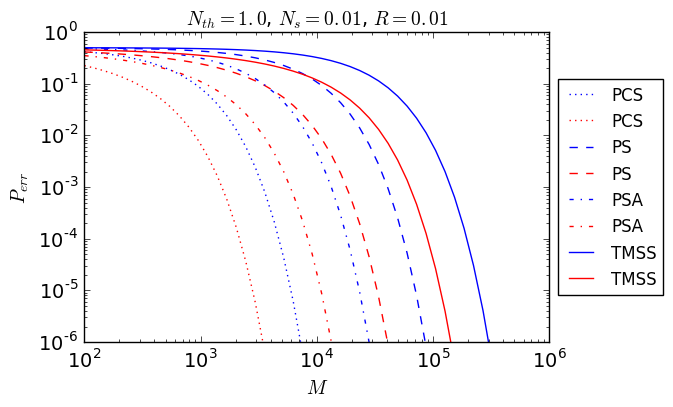

In [11]:
fig_title = '$N_{th} = 1.0$, $N_s = 0.01$, $R = 0.01$'
# states = {'TMSS': TMSS, 'PS': p_sub, 'PA': p_add, 
#           'PAS': p_add_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}
states = {'TMSS': TMSS, 'PS': p_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}

Nth = 1       # Average thermal photon numbers
N = 15        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s, states)
fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
fig.savefig("N_1e0.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

### 3. $N_s = 0.01, N_{th} = 10, \eta = 0.01$.

PCS:	0.99978869552
PS:	0.999916268392
PSA:	0.999883528019
TMSS:	0.999928788592


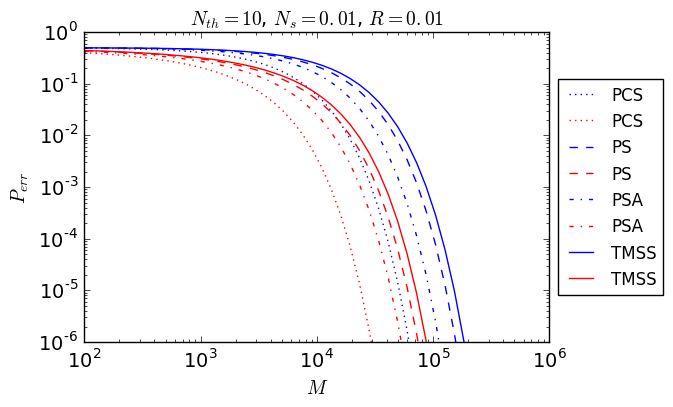

In [9]:
fig_title = '$N_{th} = 10$, $N_s = 0.01$, $R = 0.01$'
# states = {'TMSS': TMSS, 'PS': p_sub, 'PA': p_add, 
#           'PAS': p_add_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}
states = {'TMSS': TMSS, 'PS': p_sub, 'PSA': p_sub_add, 'PCS': p_cohe_sub_add}

Nth = 10      # Average thermal photon numbers
N = 20        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s, states)
fig, lgd = P_ERR_vs_M_Plot(fig_title, data, states)
fig.savefig("N_1e1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')